## BPNet tf-Modisco report

In [1]:
modisco_dir = "/users/avsec/workspace/basepair/data/processed/chipnexus/exp/models/oct-sox-nanog-klf/models/n_dil_layers=9/modisco/valid/new-hparams"

In [2]:
# Parameters
modisco_dir = "Oct4"


In [3]:
from basepair.modisco.results import ModiscoResult
from basepair.config import get_data_dir
from basepair.utils import read_json
from basepair.plot.vdom import vdom_modisco
from kipoi.readers import HDF5Reader
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from plotnine import *

Using TensorFlow backend.


In [4]:
mr = ModiscoResult(f"{modisco_dir}/modisco.h5")
mr.open()

In [5]:
# load the data
modisco_kwargs = read_json(os.path.join(modisco_dir, "kwargs.json"))
d = HDF5Reader(modisco_kwargs['imp_scores'])
d.open()

In [6]:
strand_dist_file = f"{modisco_dir}/strand_distances.h5"
if modisco_kwargs.get("ignore_strand_dist", False) and os.path.exists(strand_dist_file):
    included_samples = HDF5Reader.load(strand_dist_file)['included_samples']
else:
    included_samples = np.ones(d.f['inputs'].shape[:1], dtype=bool)
    
if modisco_kwargs.get("filter_npy", None) is not None:
    included_samples = np.load(modisco_kwargs['filter_npy']) * included_samples
    
    
id_hash = pd.DataFrame({"peak_id": d.f['/metadata/interval_from_task'][:][included_samples], 
                        "example_idx": np.arange(d.f['/metadata/interval_from_task'][included_samples].shape[0])})
tasks = list(d.f["targets"]["profile"].keys())

In [7]:
# get all seqlet instances
dfp = mr.seqlet_df_instances().rename(columns=dict(seqname="example_idx"))
dfp = pd.merge(dfp, id_hash, on="example_idx")

TF-MoDISco is using the TensorFlow backend.


In [8]:
# row = example_idx
total_counts = pd.DataFrame({task: d.f[f"/targets/profile/{task}"][:][included_samples].sum(axis=-1).sum(axis=-1)
          for task in tasks
         })

In [9]:
len(mr.patterns())

27

In [10]:
# total number of seqlets
len(dfp)

34092

In [11]:
# Number of metaclusters
len(mr.metaclusters())

2

### Number of seqlets per pattern

In [12]:
mc_stat = mr.metacluster_stats()

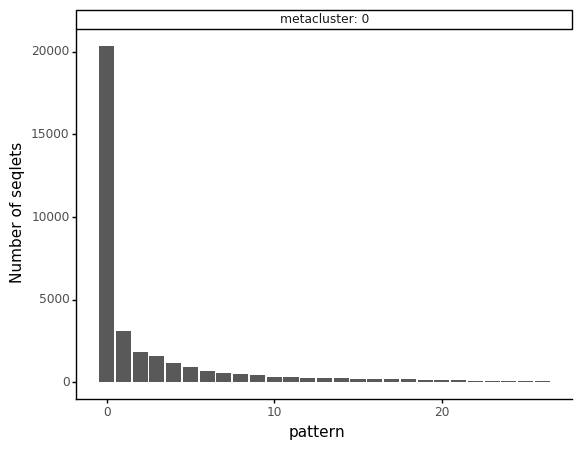

<ggplot: (8751008290238)>

In [13]:
ggplot(aes(x="pattern", y='n'), mc_stat) + geom_bar(stat='identity') + \
    facet_wrap("~metacluster", ncol=4, labeller='label_both') + \
    ylab("Number of seqlets") + theme_classic()

### Zoom-into the 500 seqlet range

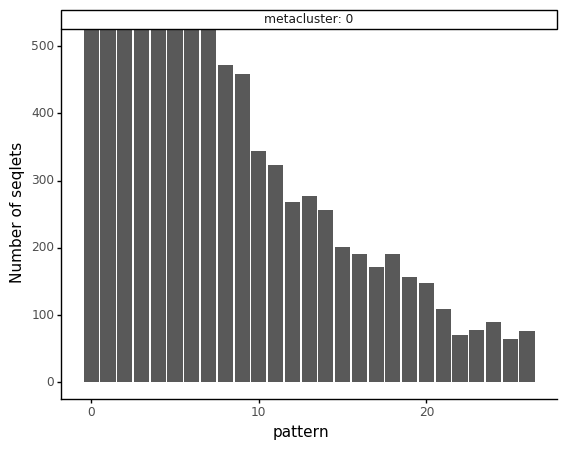

<ggplot: (8751002550483)>

In [14]:
ggplot(aes(x="pattern", y='n'), mc_stat) + geom_bar(stat='identity') + \
    facet_wrap("~metacluster", ncol=4, labeller='label_both') + \
    ylab("Number of seqlets") + theme_classic() + coord_cartesian(ylim=[0, 500])

## Important tasks per metacluster

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


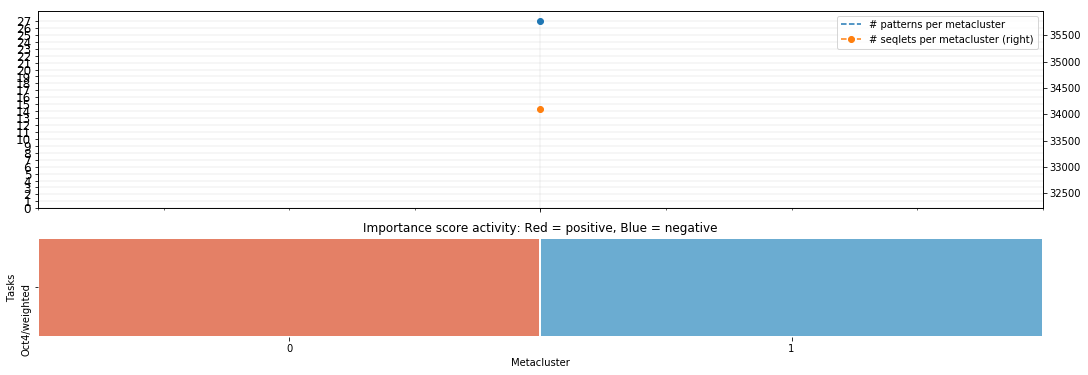

In [15]:
mcs_grouped = mc_stat.groupby("metacluster").n.agg(["count", "sum"]).reset_index()
fig, ax = plt.subplots(2, 1, sharex=False, figsize=(18,6), 
                       gridspec_kw={'height_ratios': [2,1]})
mcs_grouped.plot("metacluster", "count", 
                 label="# patterns per metacluster", style="o--", 
                 ax=ax[0], 
                 yticks=range(mcs_grouped['count'].max()+1),
                 xticks=range(38),
                 fontsize='large',
                 xlim=(-.5, len(mr.metaclusters()) - .5 ))
mcs_grouped.plot("metacluster", "sum", 
                 label="# seqlets per metacluster", 
                 style="o--", ax=ax[0], secondary_y=True)
ax[0].grid(linewidth=0.2)
mr.plot_metacluster_activity(ax[1], cbar=False)
ax[1].set_title("Importance score activity: Red = positive, Blue = negative");

In [16]:
vdom_modisco(mr, "plots", total_counts, dfp, is_open=True, trim_frac=0.08, letter_width=0.15, height=0.5)

<div><details id="metacluster_0" open><summary><b>metacluster_0</b>, # patterns: 27, # seqlets: 34092, important for: <b>Oct4</b></summary><ul><li><details id="metacluster_0/pattern_0"><summary>pattern_0: # seqlets: 20336<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAABZCAYAAAB7Ymt4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAHMtJREFUeJztnXl8VOW9/9/nnFlyJgkJM5OEJOwiIgqiQFFExdYFbitWa6222lq11KW/am9dbvur%2BvKl16sV%2BanXXlsUbXstVcG6UFewQhUouLPJFtask8k6meXMnOX3x5M5kyFhWJoEYs%2Bb17wyy8PJczLn8zzf57s8R7Isy8LBwaFH5KPdAQeHYxlHIA4OOXAE4uCQA0cgDg45cATi4JADRyAODjlwBOLgkANHIA4OOXAd7Q78q2BZFhYiJitLA3dcMi2Tn7zxE7aEtxD0Bfn9N3%2BPz%2B072t3qMxyB9BMnP3kymxs3I0syq65dxelDTz/aXToimmJNPPnRkwD43D6qmquYUDbhKPeq7xi4Q9kAY3frbgBUl8oXjV8c3c78E4RjYQo9hQC4ZTfhWPgo96hvcQTSD%2BimTkJPAKDpGo2xxqPcoyMnHAvbJqJpmY5AHP55mmJNeBQPALqlU9dRl91Akg7tMWTIUeh9NuFY2F5LpcxUTrGf%2BttTke6VyLs/j0/qPumvLvYqjkD6gXAsjFt2269r2muO7EANDb3UoyOnMdaIbuoAJPQEjdEDC2Rz42YAXLKLDQ0b%2BqV/vY0jkH6gMdaY5bmq76g/ir3552iMNpLQE0wonYAsydREehZ7PBXHsAwANEMjFA31Zzd7DUcg/UA4Fsa0TNZdv47pw6YP6DVI2jxcf%2BN6SvNLqYvU9diuMdaI1%2BUFxBrsQEI61nEE0g80RhtJmSmmVk7l9KGn0xxvPtpdOmJqI7UUeYsAKM4rpiHas9kXioZwyZkowr62ff3Sv97GEUg/0BhrRNM1%2B3W71p7doKws%2B7XXm/3zQO2OAg0dDQR8AQD8qp%2BmeFOP7ULREBKS/bq2o7Zf%2BtfbOALpB2oiNUiSuFhkSSZpJEkayUyD%2BnqwrMxD6xSTpmW/X3/01y7hWBi/6geEQFoTrT22C0VD6KaOdY/Fj077Uc7F/LGMI5B%2BoLa9luK8YgAG5w3Gq3hpivU88h7rtCRabIEE1AARLdJju4aOBnvW9Lq8A9asdATSDzREGwiowiwpLyzHrQzcCHS71m6fi1/1Y2ERTUa7tatur0a3hDtYQqJda2cg7g/iCKQf6GqWlOWXISENSE%2BWpmukzJR9LkFfEK/i7VHs%2B9r32Yv5Qm8hiqzQprX1a397A0cg/UBropWAL4BlWZT4SgZsikY4FsareAmo4lwqCitQZKXHc6nrqCPoCwJQUVCBR/EMyFiII5A%2BxrIsIskIftVvj74pMzUgF63hWBi34qa8sBxJkuzZsCeBNEYbMwIZVIEiKY5AHLoTTQn7PG23F%2BUVkdATA/JiCcfCSAhhgDCxDMvoUSAt8RZK8ksAGJI/BMuyBuQ5O/UgvUBrK3z2mfDEnnwylJRkPkubJUFfELfstlPFB2JkOZ0RkL7w/aqfpJHsJpD0rBn0BUkaSYK%2BICkz5QjkX41YDG65Bf73fzMxPU2Dc8%2BFBQtg2DBhaiiyQnmBMEtcsguP4qE2MvACZ%2BFYmJSZypoNk0ayWzS9NdGKIisEfUFkSaZYLSaux2noOPrJloeLI5AjRNPgnHNg40bxXMsEylm2DCZOhF27MmbJkAKRqq4ZGn7VPyBH08aYSFQsyhPeqQJPAdB9NgxFQ3gVL2X5ZbhkF4M8gwDY2763fzvcCzhrkCPkzjth0yZIJLp/Zhig69DYmEkPT5slKUMs1AeiFysthK4VhW7Z3S1hMRQNIUsyQwcNBUCRFfJceVS3V/dvh3sBRyBHwJ498LvfQTwuXvt8UF4OI0eCqma3DcfCJI2kHTuwsAioAdoSAy8mUBupRZZkVLc4yaSRZLA6uNtsGIqGsLAys6auEVADAzLN3xHIEfDoo2KWACGIJ56A2lphUq1cCaWl0NEhPq/vqCdlpuygGYjFbSQZGXCR5VA0RHFesZ1HljLEemT/NJJQNETSSFLiE7OmbuoEfcEBOWseewI5xstPLQv%2B%2BEdIpUCW4YIL4Ic/zHw%2BdSqsWSOeFxVhmxWFXmGWuGQXAV8ARVaIJHvOYzpWSWcEpIwUIGrS/aq/W4S8rqOOhJ5gsDoYEF6toC94wMTGY5ljTyCHylEqP920KbMgz8%2BH227r3mb0aCGk0lIxg6RtdQCP4iGgBvAongEXLGxLtBFQA3aloCRJ%2BFU/HcmOrNkwXfuRnjVlWaYkv4SEnrDFNVAYuAI5SqxaJS5%2BEGbWGWfkbh%2BKhhisDrbNEo/iocRXgiL1nKLRF4SiIeoidcRT8SM%2BRteMgDSKrBDwBXDJrqxZpCZSgyIp9lrFLbtz5m0dyxx7AjnGi4f%2B8Q8R/wAYPx4UJXf7lngLATWQNXJWFFYA9EvC4pvb36RsXhmjHx/N1KemHvFx0hkBftWPIomTdstu/Kofj%2BLJuvDrO%2Brxq/6sdPcSXwluxT3g3NvHnkCO8eKhjRszz0877eDt27Q2/KofE9N%2BrzS/FN3U%2B2U0fW79c4DYgWRb07bu1YyHSDojwK/6cSvCXPS6RIaAIilZ5mJTrMmOnoMoEqssrERCcgTyZae2MwCuKDBqVO62hmkQS8UI%2BAJZ5afB/CCaofWLQFbtW8WM4TN48utPorpVPqr96IiOE46F7ei4V8nM5hUFFfbnaVq1VoK%2BIKaVGRTKC8sxLOOANezHKo5ADpO2TlPb6z24ldccb8brEunhabMEwJ/nRzf1A%2B4I0ltEtAi1kVq%2BN%2BF73DDlBmKpGKv3rT6iY6UzAtIpM2lKC7Jnw6SRJKEnCPqCWYNCaX4pSSPpzCBfdtKRc0WBwsLcbRtjjRk73eWx3x/kFakXfZ2w%2BGHth6huldGDRwNQ4ith%2Bc7lR3SscCyMYRmUFWSPCkFf9mzYNTmz664mATVA0kgOuBw0RyCHgWlmAoSSBB5P7vbpfWxL80vtrUchk8PU1zPI6n2riaViTBoyiYSeYHLFZD6p%2B%2BSIApTpjIB08C9NQA2I2bBzv6xQNIRb6fRauTKmWLomf6Bt//PlF0gvBh4NQzRNH9Z1kFTPdHp4eUF51vuKrKC61D73Yr27610GeQdR5C1CkRSmVkzFsAx2te467GPVd9RnpcykScc60jNDerufisKKrBkkHSjtaQZZU72GuUvnMnfpXNY3rD/svvUlTjZvmkMIPCpKJgZiWSIhMReNUZGouHTbUkYWj7Tfr4nUkDJTfbrTh2VZfFz7MdOGTiOuxynOK%2BbsEWczb/U81lavtc2uQyVtDt769q1Z9zZJ77mbzrMKRUMYlkHAFyCeitvxn0JvIapL7bYGiafiTF843V6vbAxtZPV1R7ZO6gu%2B/AIpK8u%2B%2BL1e4TJO/%2BzaDsDQYPefYPdz0LYFjDi4C8E/GXn0NcjyHExTfJnJLltb9UQ6PXzx5sUs3ry42%2BdH6nI9FHa37kY3dSaXT0Z1iYDdKWWnEElGWLlnJVdOuPKwjlcfEQJ4a8dbvLXjrW6fp2fD9HY/t79zOy9

Metaclusters heatmap


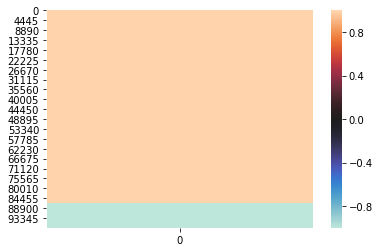

In [17]:
print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(mr.f.f['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(mr.f.f['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0);